In [1]:
pip install matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Flight Data Visualization").getOrCreate()

# Path to the cleaned data
gcs_path = "gs://flight-analysis-ms-bucket/cleaned/cleaned_flight_data.parquet"

# Load data from GCS
flight_data = spark.read.parquet(gcs_path)

# Show a sample of the data
flight_data.show()


24/12/12 20:11:15 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-------------------+-----------------+------+----+---------+--------+--------+------------------+-------------+-----------+---------+-----------------+----+-------+-----+----------+---------+--------+
|         FlightDate|          Airline|Origin|Dest|Cancelled|Diverted|DepDel15|ArrivalDelayGroups|DistanceGroup|OriginState|DestState|Operating_Airline|Year|Quarter|Month|DayofMonth|DayOfWeek|Distance|
+-------------------+-----------------+------+----+---------+--------+--------+------------------+-------------+-----------+---------+-----------------+----+-------+-----+----------+---------+--------+
|2018-01-23 00:00:00|Endeavor Air Inc.|   ABY| ATL|        0|       0|       0|                -1|            1|         GA|       GA|               9E|2018|      1|    1|        23|        2|     145|
|2018-01-24 00:00:00|Endeavor Air Inc.|   ABY| ATL|        0|       0|       0|                -1|            1|         GA|       GA|               9E|2018|      1|    1|        24|        3|

/tmp/ipykernel_5704/1491974814.py:9: FutureWarning:                             

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancelled_distribution, x="Cancelled", y="count", palette="viridis")


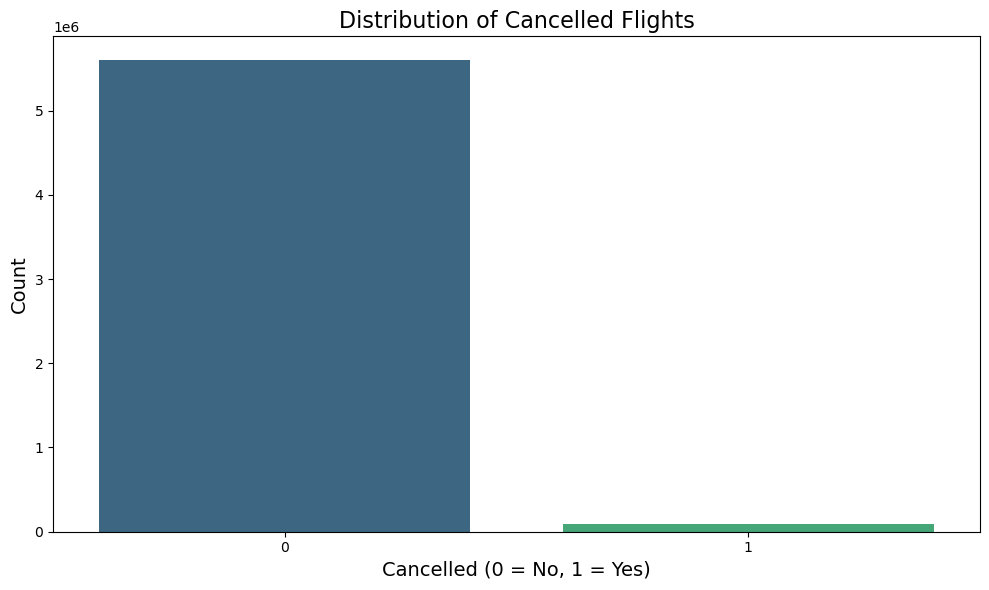

In [3]:
# Calculate distribution in Spark
cancelled_distribution = flight_data.groupBy("Cancelled").count().toPandas()

# Plot in Pandas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=cancelled_distribution, x="Cancelled", y="count", palette="viridis")
plt.title("Distribution of Cancelled Flights", fontsize=16)
plt.xlabel("Cancelled (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipykernel_5704/815766341.py:6: FutureWarning:                              

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=diverted_distribution, x="Diverted", y="count", palette="magma")


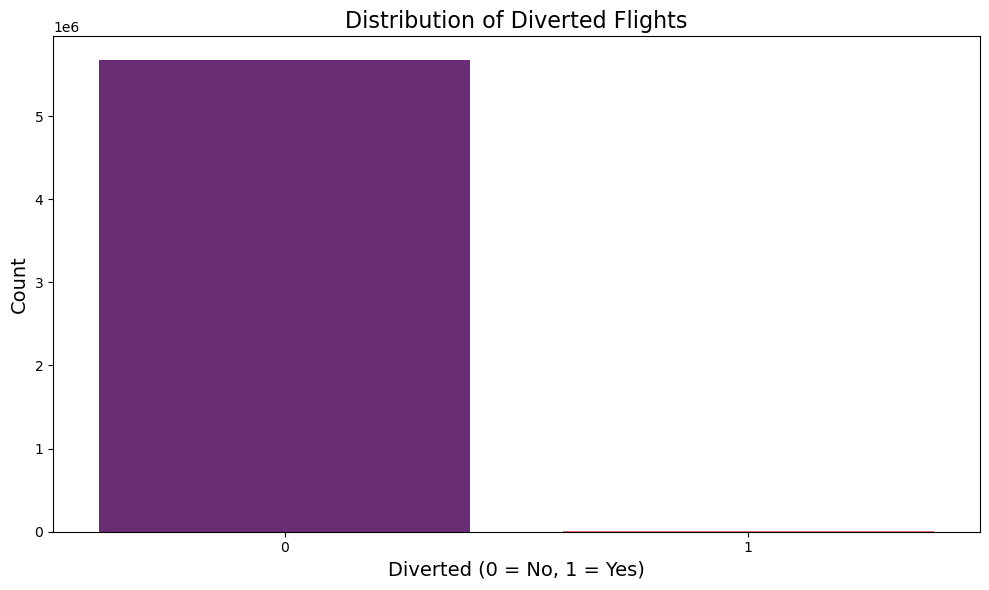

In [4]:
# Calculate Diverted distribution in Spark
diverted_distribution = flight_data.groupBy("Diverted").count().toPandas()

# Plot Diverted flights distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=diverted_distribution, x="Diverted", y="count", palette="magma")
plt.title("Distribution of Diverted Flights", fontsize=16)
plt.xlabel("Diverted (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.show()


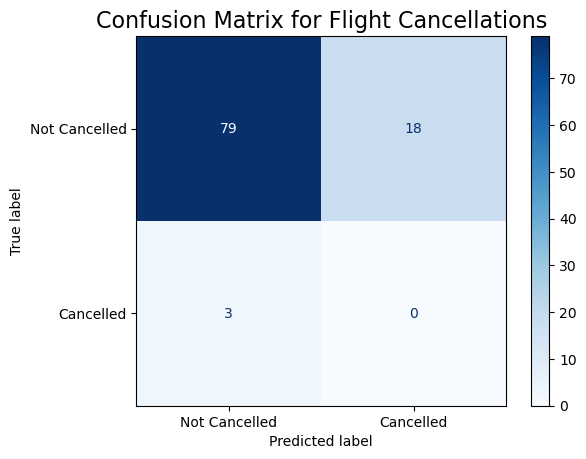

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dummy data for illustration (replace with actual values later)
y_true = flight_data.select("Cancelled").fillna(0).rdd.map(lambda row: row[0]).collect()[:100]  # Collect 100 samples
y_pred = flight_data.select("DepDel15").fillna(0).rdd.map(lambda row: row[0]).collect()[:100]  # Replace with predicted

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Not Cancelled", "Cancelled"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix for Flight Cancellations", fontsize=16)
plt.show()

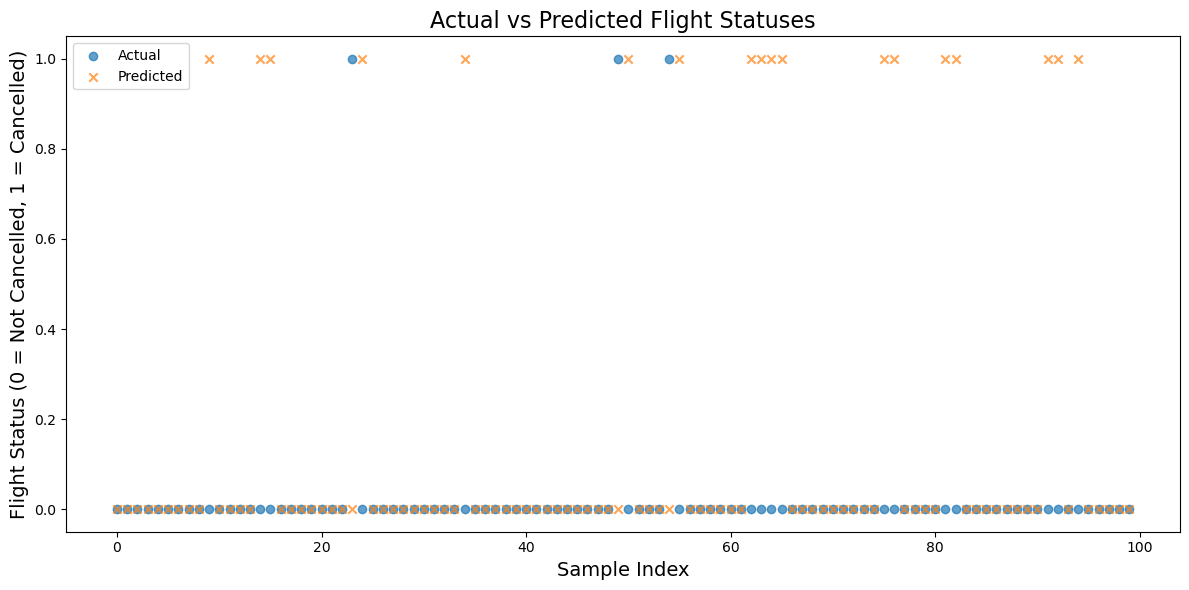

In [6]:
# Create scatter plot for actual vs predicted (using first 100 samples)
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_true)), y_true, label="Actual", alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.7, marker='x')
plt.title("Actual vs Predicted Flight Statuses", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Flight Status (0 = Not Cancelled, 1 = Cancelled)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_5704/1134490044.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_features, palette="coolwarm")


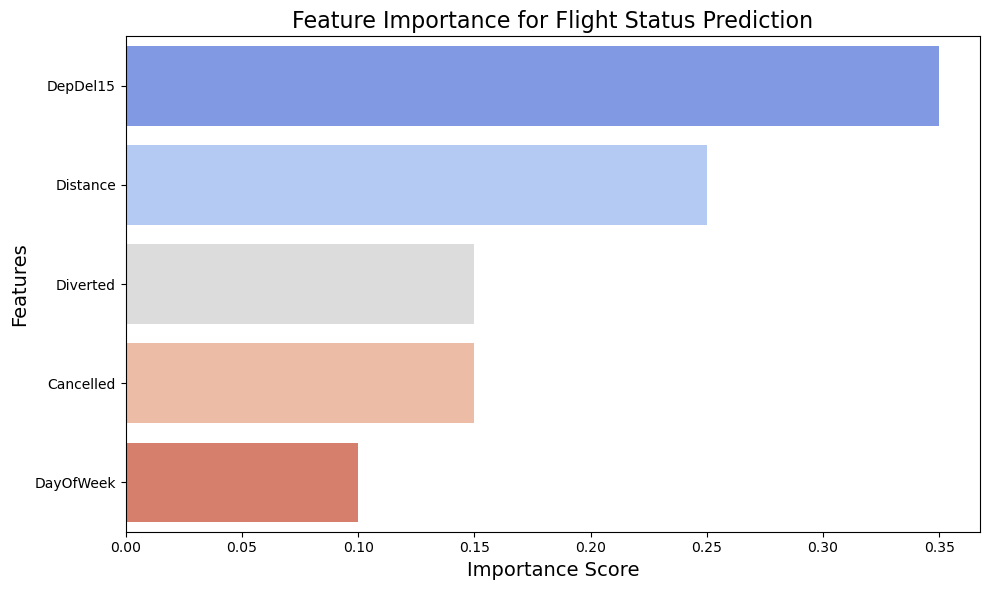

In [7]:
# Example feature importance values (replace with actual data)
feature_importances = {'Distance': 0.25, 'DepDel15': 0.35, 'Diverted': 0.15, 'DayOfWeek': 0.1, 'Cancelled': 0.15}

# Sort features by importance
features = list(feature_importances.keys())
importances = list(feature_importances.values())
sorted_idx = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
sorted_features = [features[i] for i in sorted_idx]
sorted_importances = [importances[i] for i in sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features, palette="coolwarm")
plt.title("Feature Importance for Flight Status Prediction", fontsize=16)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
plt.savefig("cancelled_flights_distribution.png")

<Figure size 640x480 with 0 Axes>